<a href="https://colab.research.google.com/github/JunjieYU-UoM/AutoML_climate_tutorial/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial of AutoML for climate/weather data

Language: Python

Packages: obswx, matplotlib, flaml, numpy, pandas, sklearn

- learn to process time series data
- learn to use the flaml library
- learn to use the matplotlib library

In [2]:
from obswx import *
import numpy as np
met = obswx(source='ISD')
# Load the metadata
met.get_meta(load=True).head()

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,0.00,0.000,7018.0,20110309,20130730
1,007026,99999,WXPOD 7026,AF,NaN,NaN,0.00,0.000,7026.0,20120713,20170822
2,007070,99999,WXPOD 7070,AF,NaN,NaN,0.00,0.000,7070.0,20140923,20150926
3,008260,99999,WXPOD8270,NaN,NaN,NaN,0.00,0.000,0.0,20050101,20120731
4,008268,99999,WXPOD8278,AF,NaN,NaN,32.95,65.567,1156.7,20100519,20120323


In [23]:
df = met.get_data(year=2023, station= "03334099999", isd_source="AWS")
df['TMP'] = df['TMP'].replace(',','.', regex=True).astype(float) # transform the temperature to float

Getting data from NOAA ISD
Here to help select station:  https://envdes.github.io/obswx/isd_map


In [27]:
df.index = pd.to_datetime(df['DATE'])

In [28]:
df.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,GA2,GA3,GA4,GE1,GF1,MA1,MW1,MW2,OC1,REM
DATE,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:20:00,3334099999,2023-01-01T00:20:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,NaN,NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,04,1,99,9,01341,1,99,9,99,9","09960,1,99999,9",NaN,NaN,NaN,MET081METAR EGCC 010020Z AUTO 19006KT 150V230 ...
2023-01-01 00:50:00,3334099999,2023-01-01T00:50:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,NaN,NaN,NaN,NaN,NaN,"09970,1,99999,9",NaN,NaN,NaN,MET068METAR COR EGCC 010050Z AUTO 21012KT 9999...
2023-01-01 01:20:00,3334099999,2023-01-01T01:20:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,"07,1,+01128,1,99,9",NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,07,1,99,9,00914,1,99,9,99,9","09970,1,99999,9",NaN,NaN,NaN,MET079METAR EGCC 010120Z AUTO 21012KT 9999 BKN...
2023-01-01 01:50:00,3334099999,2023-01-01T01:50:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,"04,1,+01372,1,99,9",NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,02,1,99,9,00823,1,99,9,99,9","09970,1,99999,9",NaN,NaN,NaN,MET089METAR COR EGCC 010150Z AUTO 22009KT 9999...
2023-01-01 02:20:00,3334099999,2023-01-01T02:20:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,"07,1,+01036,1,99,9","07,1,+01219,1,99,9",NaN,"9,AGL ,+99999,+99999","99,99,9,04,1,99,9,00884,1,99,9,99,9","09980,1,99999,9",NaN,NaN,NaN,MET080METAR COR EGCC 010220Z AUTO 22007KT 9999...


<Axes: xlabel='DATE'>

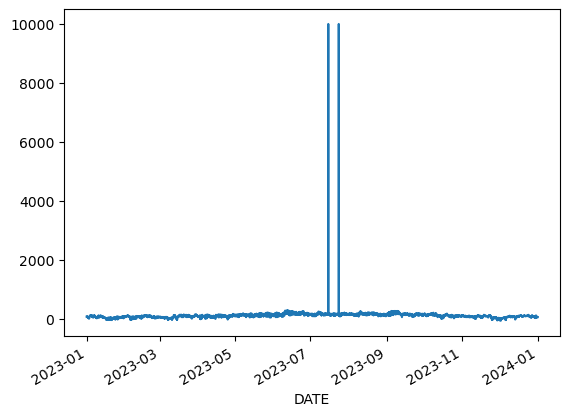

In [29]:
df['TMP'].plot()

How to deal with the missing data?

1. interpolate
2. drop it
3. fill it with a constant value
    - mean
    - median
    - last observation
    - next observation
4. others (e.g. using a model to predict the missing value)

In [37]:
# Apply linear interpolation
import numpy as np

df['T_filled'] = df['TMP'].apply(lambda x: x if x < 9999 else np.nan).interpolate(method='linear')

<Axes: xlabel='DATE'>

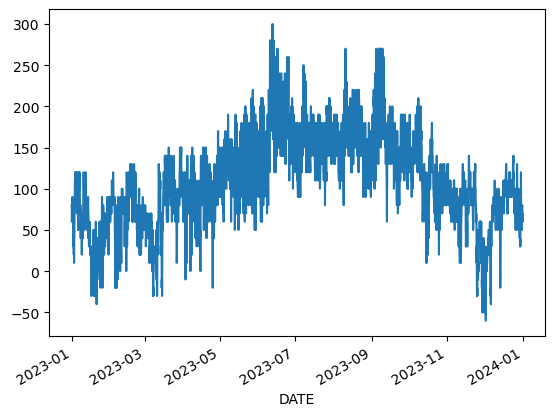

In [38]:
df['T_filled'].plot()

In [40]:
df.to_csv('data.csv')

In [1]:
from flaml import AutoML
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', index_col=0, parse_dates=True)

/Users/user/miniconda3/envs/anMBR/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3308: DtypeWarning: Columns (19,23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,STATION,DATE.1,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,GA3,GA4,GE1,GF1,MA1,MW1,MW2,OC1,REM,T_filled
DATE,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:20:00,3334099999,2023-01-01T00:20:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,04,1,99,9,01341,1,99,9,99,9","09960,1,99999,9",NaN,NaN,NaN,MET081METAR EGCC 010020Z AUTO 19006KT 150V230 ...,80.1
2023-01-01 00:50:00,3334099999,2023-01-01T00:50:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,NaN,NaN,NaN,NaN,"09970,1,99999,9",NaN,NaN,NaN,MET068METAR COR EGCC 010050Z AUTO 21012KT 9999...,80.1
2023-01-01 01:20:00,3334099999,2023-01-01T01:20:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,07,1,99,9,00914,1,99,9,99,9","09970,1,99999,9",NaN,NaN,NaN,MET079METAR EGCC 010120Z AUTO 21012KT 9999 BKN...,80.1
2023-01-01 01:50:00,3334099999,2023-01-01T01:50:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,NaN,NaN,"9,AGL ,+99999,+99999","99,99,9,02,1,99,9,00823,1,99,9,99,9","09970,1,99999,9",NaN,NaN,NaN,MET089METAR COR EGCC 010150Z AUTO 22009KT 9999...,80.1
2023-01-01 02:20:00,3334099999,2023-01-01T02:20:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,"07,1,+01219,1,99,9",NaN,"9,AGL ,+99999,+99999","99,99,9,04,1,99,9,00884,1,99,9,99,9","09980,1,99999,9",NaN,NaN,NaN,MET080METAR COR EGCC 010220Z AUTO 22007KT 9999...,70.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 21:50:00,3334099999,2023-12-31T21:50:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,"07,1,+00853,1,99,9",NaN,"9,AGL ,+99999,+99999","99,99,9,04,1,99,9,00427,1,99,9,99,9","09870,1,99999,9",NaN,NaN,NaN,MET105METAR COR EGCC 312150Z AUTO 25012KT 9999...,60.1
2023-12-31 22:20:00,3334099999,2023-12-31T22:20:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,"08,1,+01311,1,99,9",NaN,"9,AGL ,+99999,+99999","99,99,9,07,1,99,9,00853,1,99,9,99,9","09880,1,99999,9",NaN,NaN,NaN,MET102METAR COR EGCC 312220Z AUTO 24011KT 4300...,60.1
2023-12-31 22:50:00,3334099999,2023-12-31T22:50:00,4,53.353744,-2.27495,78.33,"MANCHESTER, UK",FM-15,99999,V020,...,"07,1,+00792,1,99,9",NaN,"9,AGL ,+99999,+99999","99,99,9,02,1,99,9,00366,1,99,9,99,9","09880,1,99999,9","63,1",NaN,NaN,MET090METAR COR EGCC 312250Z 25013KT 5000 RA F...,60.1


In [4]:
df['T_filled'].iloc[0:len(df)-200]

DATE
2023-01-01 00:20:00    80.1
2023-01-01 00:50:00    80.1
2023-01-01 01:20:00    80.1
2023-01-01 01:50:00    80.1
2023-01-01 02:20:00    70.1
                       ... 
2023-12-27 17:50:00    80.1
2023-12-27 18:20:00    80.1
2023-12-27 18:50:00    80.1
2023-12-27 19:20:00    80.1
2023-12-27 19:50:00    80.1
Name: T_filled, Length: 17156, dtype: float64

In [21]:
df_ = df['T_filled'].resample('D').mean().reset_index()

In [39]:
automl = AutoML()
df_ = df['T_filled'].resample('D').mean().reset_index()
X_train = df_.iloc[0:len(df_)-20]
automl.fit(
    dataframe=X_train,  # a single column of timestamp
    label="T_filled",  # value column name
    period=1,  # time horizon to forecast, e.g., 12 months
    task="ts_forecast",
    time_budget=15,  # time budget in seconds
    log_file_name="ts_forecast.log",
    eval_method="holdout",
    estimator_list=[
        "lgbm",
        "xgboost",
        "extra_tree",
    ],
)

[flaml.automl.logger: 08-13 17:22:54] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 08-13 17:22:54] {1700} INFO - Data split method: time
[flaml.automl.logger: 08-13 17:22:54] {1703} INFO - Evaluation method: holdout
[flaml.automl.logger: 08-13 17:22:54] {1801} INFO - Minimizing error metric: mape
[flaml.automl.logger: 08-13 17:22:54] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'extra_tree']
[flaml.automl.logger: 08-13 17:22:54] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-13 17:22:54] {2347} INFO - Estimated sufficient time budget=144s. Estimated necessary time budget=0s.
[flaml.automl.logger: 08-13 17:22:54] {2394} INFO -  at 0.0s,	estimator lgbm's best error=0.3128,	best estimator lgbm's best error=0.3128
[flaml.automl.logger: 08-13 17:22:54] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-13 17:22:54] {2394} INFO -  at 0.1s,	estimator lgbm's best error=0.3128,	best estimator lgbm's best error=0.3

In [40]:
test = df_.iloc[len(df_)-20:]

In [41]:
prediction = automl.predict(test)

In [42]:
import matplotlib.pyplot as plt


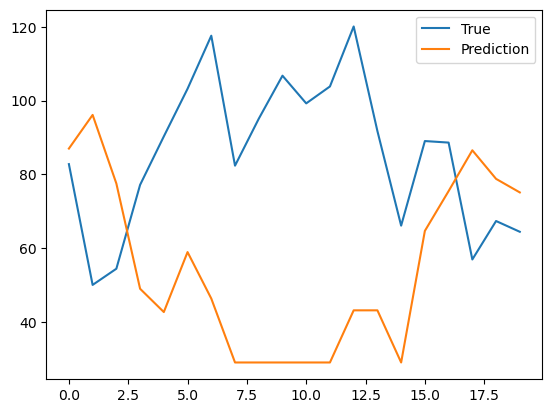

In [43]:
plt.plot(test['T_filled'].values, label='True')
plt.plot(prediction, label='Prediction')
plt.legend()